# install dependencies

In [1]:
!pip3 install inverse-canopy==0.0.21

# **Model Inputs**

In [2]:
from inverse_canopy import InverseCanopy
import tensorflow as tf
import numpy as np

tunable initialized: dtype=<dtype: 'float64'>, epsilon=1e-20
learning_rate: 0.01,patience: 1000,min_improvement: 0.001,max_steps: 50000,seed: 372
Step 0: Loss = 20.7871884474226363, performing 76.5 it/sec
Step 100: Loss = 20.1671176749102798, performing 294.9 it/sec
Step 200: Loss = 19.5520283072143712, performing 285.1 it/sec
Step 300: Loss = 18.8269515142471136, performing 285.7 it/sec
Step 400: Loss = 17.6115466014491844, performing 264.4 it/sec
Step 500: Loss = 14.9883913035212331, performing 259.6 it/sec
Step 600: Loss = 13.1015765203292975, performing 261.4 it/sec
Step 700: Loss = 11.2964956278689002, performing 258.3 it/sec
Step 800: Loss = 8.5697526248438667, performing 263.3 it/sec
Step 900: Loss = 6.2453026146822674, performing 263.3 it/sec
Step 1000: Loss = 4.1263149975075537, performing 251.9 it/sec
Step 1100: Loss = 2.1365889129655837, performing 266.1 it/sec
Step 1200: Loss = 1.2720173402575266, performing 263.1 it/sec
Step 1300: Loss = 0.9541906570369174, performing 265.

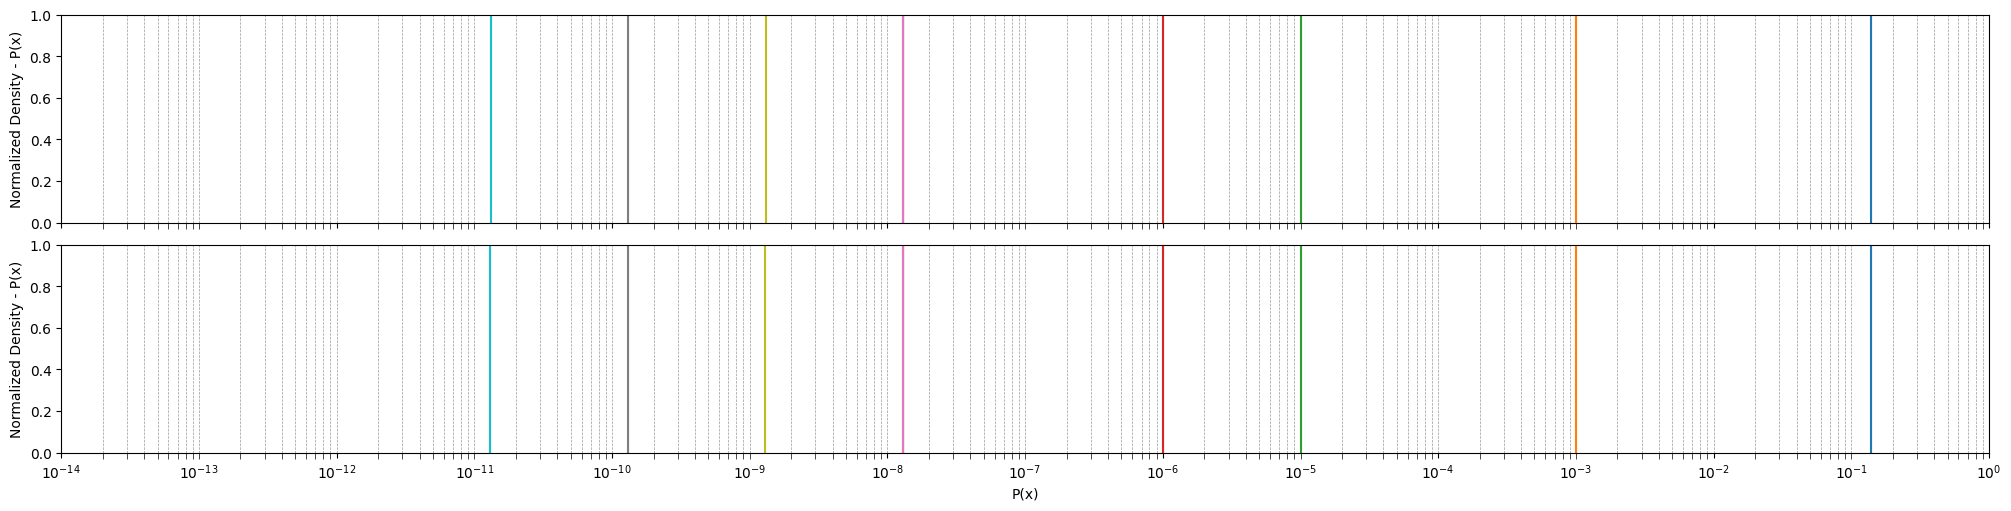

In [14]:
tunable = {
 'num_samples': 10000,      # number of monte carlo samples
 'learning_rate': 0.01,    # the gradient update rate
 'dtype': tf.float64,     # use 64-bit floats
 'epsilon': 1e-20,        # useful for avoiding log(0 + epsilon) type errors
 'max_steps': 50000,       # maximum steps, regardless of convergence
 'patience': 1000,          # number of steps to wait before early stopping if the loss does not improve
 'initiating_event_frequency': 1.4e-1,
 'freeze_initiating_event': True,
}

conditional_events = {
    'names': ['SFPB', 'SNPB', 'NPPB', 'SLPE', 'DETS', 'SHTS', 'NSSS|~SHTS', 'NSSS|SHTS', 'NSSS|DETS'],
    'bounds': {
        'mean': {
            'min': 1e-10,
            'max': 1.00,
        },
        'std': {
            'min': 1e-10,
            'max': 1e8,
        },
     },
    'initial': {
       'mean': 5e-1,
       'std': 1e8,
    }
}

end_states = {
    'SFPB-1': {
        'sequence': [1, 0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 1.39e-1,
    },
    'SFPB-2': {
        'sequence': [1, 1, 0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 1e-3,
    },
    'SFPB-3': {
        'sequence': [1, 1, 1, 0, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 1e-5,
    },
    'SFPB-4': {
        'sequence': [1, 1, 1, 1, 0, 0, 0, np.nan, np.nan],
        'probability': 1e-6,
    },
    'SFPB-5': {
        'sequence': [1, 1, 1, 1, 0, 0, 1, np.nan, np.nan],
        'probability': 1.3e-8
    },
    'SFPB-6': {
        'sequence': [1, 1, 1, 1, 0, 1, np.nan, 0, np.nan],
        'probability': 1.3e-8
    },
    'SFPB-7': {
        'sequence': [1, 1, 1, 1, 0, 1, np.nan, 1, np.nan],
        'probability': 1.3e-10
    },
    'SFPB-8': {
        'sequence': [1, 1, 1, 1, 1, np.nan, np.nan, np.nan, 0],
        'probability': 1.3e-9
    },
    'SFPB-9': {
        'sequence': [1, 1, 1, 1, 1, np.nan, np.nan, np.nan, 1],
        'probability': 1.3e-11
    },
}

model = InverseCanopy(conditional_events, end_states, tunable)
model.fit(steps=tunable['max_steps'], patience=tunable['patience'], learning_rate=tunable['learning_rate'])
model.summarize(show_plot=True, show_metrics=False)